# Задание, оцениваемое сокурсниками: Центральная предельная теорема своими руками

# Распределение Пуассона

Генерация выборок из распределения Пуассона с параметром $\lambda$:

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

In [75]:
# зададим параметр lambda
poisson_rv = sts.poisson(3)
# сгенерируем 1000 значений
sample = poisson_rv.rvs(1000)

Построим гистограмму выборки и нарисуем поверх неё теоретическую плотность распределения нашей случайной величины (чтобы величины были в одном масштабе, не забыть выставить у гистограммы значение параметра normed=True).

Text(0.5,0,'$x$')

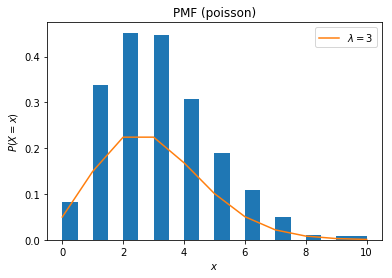

In [76]:
# построим гистограмму выборки
plt.hist(sample, bins=20, normed=True)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')
# на том же графике построим теоретическую плотность распределения:
x = np.linspace(0,10,11)

symbols = iter(['-'])
for l in [3]:
    rv = sts.poisson(l)
    pmf = rv.pmf(x)
    plt.plot(x, pmf, next(symbols), label="$\lambda=%s$" % l)
plt.legend()
plt.title("PMF (poisson)")

plt.ylabel('$P(X=x)$')
plt.xlabel('$x$')

Моя задача — оценить распределение выборочного среднего моей случайной величины при разных объёмах выборок. Для этого при трёх и более значениях n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. 

## Выборка n = 5

In [77]:
# зададим параметр lambda
poisson_rv = sts.poisson(3)
# сгенерируем 1000 выборок объема 5
sample_list = [poisson_rv.rvs(5) for i in np.arange(1000)]

Построим гистограммы распределений их выборочных средних

In [78]:
population_mean_list = [np.mean(sample) for sample in sample_list]

Text(0.5,0,'$x$')

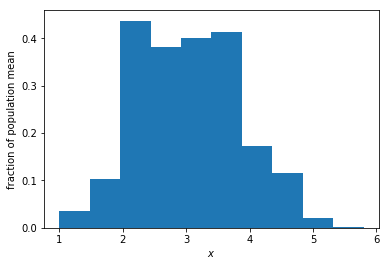

In [79]:
# построим гистограмму выборочного среднего
plt.hist(population_mean_list, bins=10, normed=True)
plt.ylabel('fraction of population mean')
plt.xlabel('$x$')

Дисперсия в распределении Пуассона равна $\lambda$ из свойств данного распределения, соответсвенно для построения нормального распределения известно DX/n = $\lambda$/n = 3/5. Из свойств распределения Пуассона также известно, что EX = $\lambda$ = 3. Теперь можно построить на том же графике плотность соответствующего нормального распределения.

In [80]:
mu = 3.0
sigma = np.sqrt(3.0/5.0)
print sigma
# зададим нормально распределенную случайную величину
norm_rv = sts.norm(loc=mu, scale=sigma)

# сгенерируем 10 значений
norm_rv.rvs(size=10)

0.7745966692414834


array([3.47394742, 2.96567339, 3.20755812, 3.33862134, 3.00591973,
       3.94045005, 2.85917858, 3.63840994, 2.91400346, 2.8179565 ])

Построим график функции плотности вероятности:

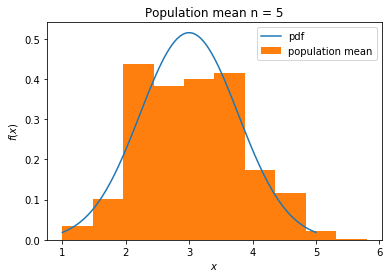

In [81]:
x = np.linspace(1,5,100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='pdf')
plt.title('Population mean n = 5')
plt.hist(population_mean_list, bins=10, normed=True, label='population mean')
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend() 
plt.show()

## Выборка n = 10

0.5477225575051661


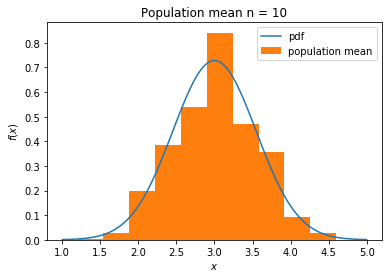

In [82]:
# зададим параметр lambda
poisson_rv = sts.poisson(3)
# сгенерируем 1000 выборок объема 50
sample_list = [poisson_rv.rvs(10) for i in np.arange(1000)]
population_mean_list = [np.mean(sample) for sample in sample_list]

mu = 3.0
sigma = np.sqrt(3.0/10.0)
print sigma
# зададим нормально распределенную случайную величину
norm_rv = sts.norm(loc=mu, scale=sigma)
# сгенерируем 1000 значений
norm_rv.rvs(size=10)

# Построим гистограммы распределений их выборочных средних и график функции плотности вероятности
x = np.linspace(1,5,100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='pdf')
plt.title('Population mean n = 10')
plt.hist(population_mean_list, bins=10, normed=True, label='population mean')
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend() 
plt.show() 

## Выборка n = 50

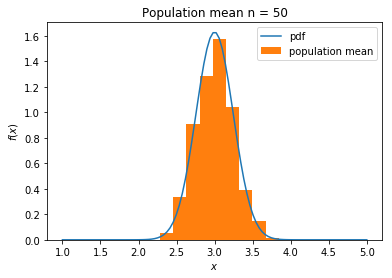

In [83]:
# зададим параметр lambda
poisson_rv = sts.poisson(3)
# сгенерируем 1000 выборок объема 50
sample_list = [poisson_rv.rvs(50) for i in np.arange(1000)]
population_mean_list = [np.mean(sample) for sample in sample_list]

mu = 3.0
sigma = np.sqrt(3.0/50.0)
# зададим нормально распределенную случайную величину
norm_rv = sts.norm(loc=mu, scale=sigma)


# Построим гистограммы распределений их выборочных средних и график функции плотности вероятности
x = np.linspace(1,5,100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='pdf')

plt.title('Population mean n = 50')
plt.hist(population_mean_list, bins=10, normed=True, label='population mean')
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend() 
plt.show() 

Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?

Чем больше n, тем гистограмма выборочного среднего уже, а это в свою очередь говорит нам о том, что оценка становится точнее с увеличением размера выборок. Точность аппроксимации увеличивается.
При увеличении объема выборок распределение становится все более гладким и все более похожим на нормальное. Таким образом, центральная предельная теорема в данном случае работает.